# Tabular Data
Processing tabular data using numpy

In [3]:
import numpy
import os

In [2]:
help(numpy.genfromtxt)

Help on function genfromtxt in module numpy:

genfromtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=" !#$%&'()*+,-./:;<=>?@[\\]^{|}~", replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None, encoding='bytes')
    Load data from a text file, with missing values handled as specified.
    
    Each line past the first `skip_header` lines is split at the `delimiter`
    character, and characters following the `comments` character are discarded.
    
    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is `.gz` or `.bz2`, the file is first decompressed. Note
        that generators must return byte strings. The string

In [4]:
distance_file = os.path.join('data','distance_data_headers.csv')

distances = numpy.genfromtxt(fname = distance_file, delimiter = ',', dtype = 'unicode')
print(distances)

[['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']
 ['1' '8.9542' '5.8024' '11.5478' '9.9557']
 ['2' '8.6181' '6.0942' '13.9594' '11.6945']
 ...
 ['9998' '8.6625' '7.7306' '9.5469' '10.3063']
 ['9999' '9.2456' '7.8886' '9.8151' '10.7564']
 ['10000' '8.8135' '7.917' '9.9517' '10.7848']]


In [5]:
headers = distances [0]
print (headers)

['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']


In [8]:
#Slice distances to get the values 
data = distances [1:]
print (values)

[['1' '8.9542' '5.8024' '11.5478' '9.9557']
 ['2' '8.6181' '6.0942' '13.9594' '11.6945']
 ['3' '9.0066' '6.0637' '13.0924' '11.3043']
 ...
 ['9998' '8.6625' '7.7306' '9.5469' '10.3063']
 ['9999' '9.2456' '7.8886' '9.8151' '10.7564']
 ['10000' '8.8135' '7.917' '9.9517' '10.7848']]


In [9]:
data = data.astype(numpy.float)
print(data)

[[1.00000e+00 8.95420e+00 5.80240e+00 1.15478e+01 9.95570e+00]
 [2.00000e+00 8.61810e+00 6.09420e+00 1.39594e+01 1.16945e+01]
 [3.00000e+00 9.00660e+00 6.06370e+00 1.30924e+01 1.13043e+01]
 ...
 [9.99800e+03 8.66250e+00 7.73060e+00 9.54690e+00 1.03063e+01]
 [9.99900e+03 9.24560e+00 7.88860e+00 9.81510e+00 1.07564e+01]
 [1.00000e+04 8.81350e+00 7.91700e+00 9.95170e+00 1.07848e+01]]


In [10]:
# To slice a 2D
# array_name[row_index, column_index]

print(data[0,1])
print(data[1,0])

8.9542
2.0


In [12]:
# data_average = numpy.mean(data_set)
thr4_atp = data[:,1]
avg_thr4_atp = numpy.mean(thr4_atp)
print(avg_thr4_atp)

10.876950930000001


In [14]:
# Create a variable called num_columns which is the number of columns
num_columns = len(headers)
print(num_columns)

5


In [17]:
for i in range (1, num_columns):
    #print(i)
    column = data[:,i]
    avg_col = numpy.mean(column)
    data_label = headers [i]
    print(F'{data_label} : {avg_col:.3f}')

THR4_ATP : 10.877
THR4_ASP : 7.342
TYR6_ATP : 11.210
TYR6_ASP : 10.993


# Plotting
Plotting data using matplotlib

In [18]:
import matplotlib.pyplot as plt

%matplotlib inline

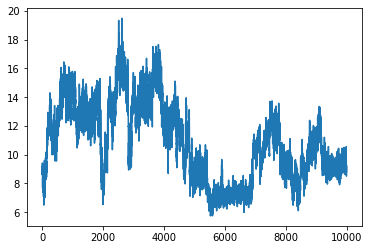

In [19]:
plt.figure()
plt.plot(data[:,1])

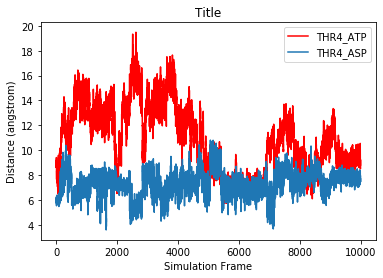

In [29]:
plt.figure ()

plt.xlabel('Simulation Frame')
plt.ylabel('Distance (angstrom)')
plt.plot(data[:,1], label = headers[1], color='red')
plt.plot(data[:,2], label = headers[2])
plt.title('Title')
plt.legend()

plt.savefig('two_samples.png', dpi=350)

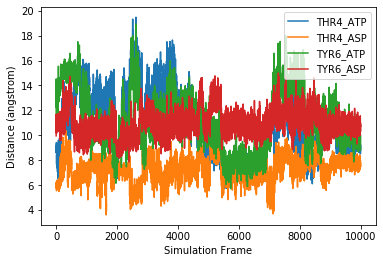

In [31]:
plt.figure()
for col in range(1, num_columns):
    plt.plot(data[:,col], label=headers[col])
    
plt.xlabel('Simulation Frame')
plt.ylabel('Distance (angstrom)')
plt.legend()

plt.savefig('all_samples.png')

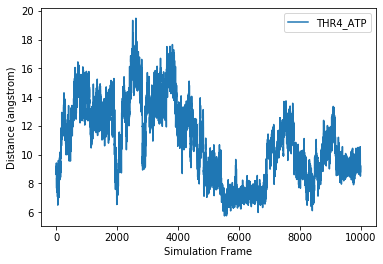

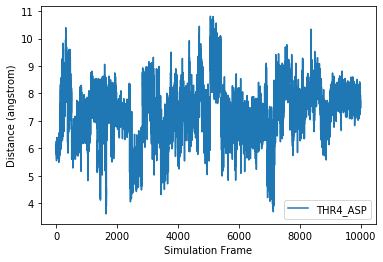

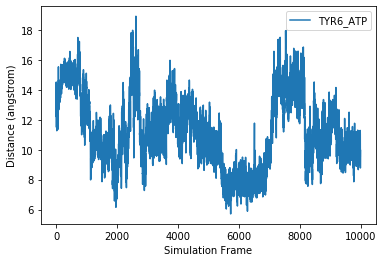

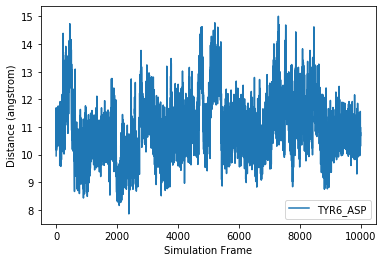

In [34]:
# Make a plot for each sample

for col in range(1, num_columns):
    sample_name = headers[col]
    
    plt.figure()
    plt.plot(data[:,col], label=sample_name)
    
    plt.xlabel('Simulation Frame')
    plt.ylabel('Distance (angstrom)')
    plt.legend()

    plt.savefig(F'{sample_name}.png')